## Fuentes
Feature Detection, Description and Matching of Images using OpenCV - https://www.analyticsvidhya.com/blog/2021/06/feature-detection-description-and-matching-of-images-using-opencv/

Momentos de un objeto, centroide, área y perímetro Python OpenCV - https://www.youtube.com/watch?v=sPGfnYuj0-Y

Shape Matching using Hu Moments (C++/Python) - https://learnopencv.com/shape-matching-using-hu-moments-c-python/

Mahotas – Zernike Moments - https://www.geeksforgeeks.org/mahotas-zernike-moments/

Mahotas — Image Processing and Manipulation for Python - https://medium.com/analytics-vidhya/mahotas-image-processing-and-manipulation-for-python-ddb1edb68880

Feature Engineering for Images: A Valuable Introduction to the HOG Feature Descriptor - https://www.analyticsvidhya.com/blog/2019/09/feature-engineering-images-introduction-hog-feature-descriptor/

Oficial documentacion - Module feature: https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.hog

# Calculo de Momentos

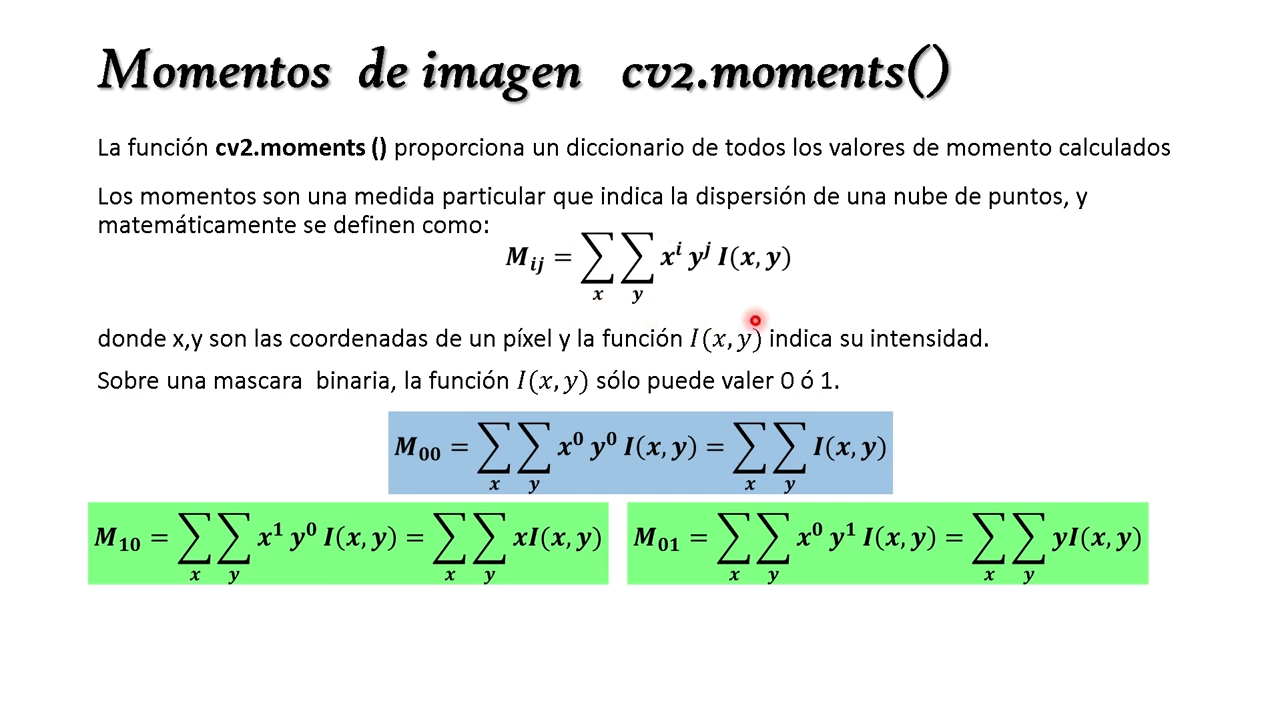

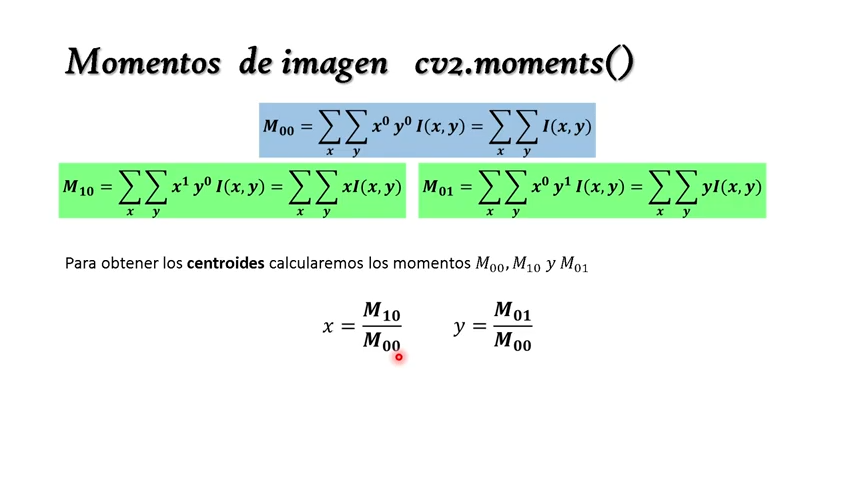

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

Podemos crear una matriz por defecto, definir el centro y dibujarlo. Esta es la forma en la que funciona el momento central.

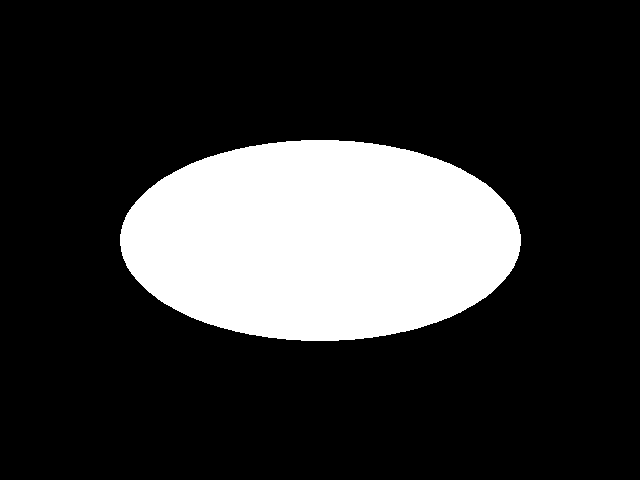

In [2]:
image = np.zeros((480, 640), np.uint8)
image1 = cv2.ellipse(image, (320, 240), (200, 100), 0, 0, 360, 255, -1)
cv2_imshow(image1)

Las imagenes tienen momentos centrales diferentes. Depende de los objetos a identificar.

In [15]:
# image = np.zeros((480, 640), np.uint8)
image_color = cv2.imread('lena_std.tif')
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
image_ctr = cv2.ellipse(image_gray, (320, 240), (200, 100), 0, 0, 360, 255, -1)

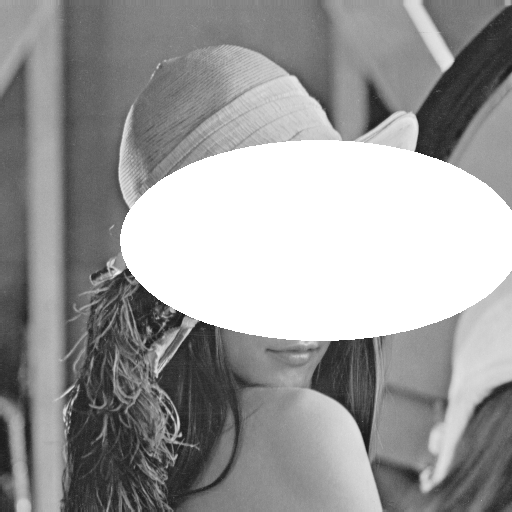

In [4]:
cv2_imshow(image_ctr)

Para calcular los momentos centrales reales usamos la funcion moments

In [16]:
m = cv2.moments(image_gray)
for name, val in m.items():
    print(name, '\t', val)

m00 	 40528695.0
m10 	 11161371324.0
m01 	 9996794536.0
m20 	 3869701826576.0
m11 	 2794390926826.0
m02 	 3190241915026.0
m30 	 1480230034159542.0
m21 	 979398817156856.0
m12 	 890930907473260.0
m03 	 1153807127404684.0
mu20 	 795923856863.1948
mu11 	 41330758813.42822
mu02 	 724435873282.0098
mu30 	 -23849542637502.25
mu21 	 2134931203881.3438
mu12 	 -8032773314973.281
mu03 	 9524882341869.75
nu20 	 0.0004845585738794234
nu11 	 2.5162172706969762e-05
nu02 	 0.0004410366778149753
nu30 	 -2.2807280567563464e-06
nu21 	 2.041631393081814e-07
nu12 	 -7.681728640034813e-07
nu03 	 9.10863018406316e-07


Con los momentos podemos calcular las coordenadas del centroide de la imagen.

In [17]:
cX = int( m['m10'] / m['m00'])
cY = int( m['m01'] / m['m00'])
print('Centroide X estimado:', cX)
print('Centroide Y estimado:', cY)

Centroide X estimado: 275
Centroide Y estimado: 246


Finalmente ubicamos el centroide en la imagen

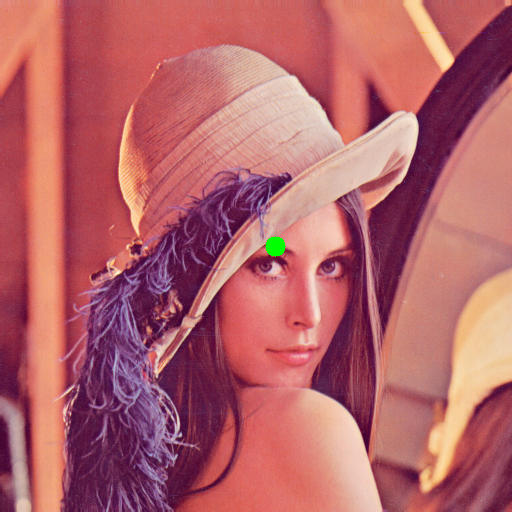

In [20]:
image_ctr1 = cv2.circle(image_color, (cX, cY), 10,(0,255,0),-1)
cv2_imshow(image_ctr1)

Con los momentos puedo obtener datos importantes de formas y figuras. En el ejemplo se detectan contornos y se colocan centroides.

---------------------------------------------
Original
---------------------------------------------


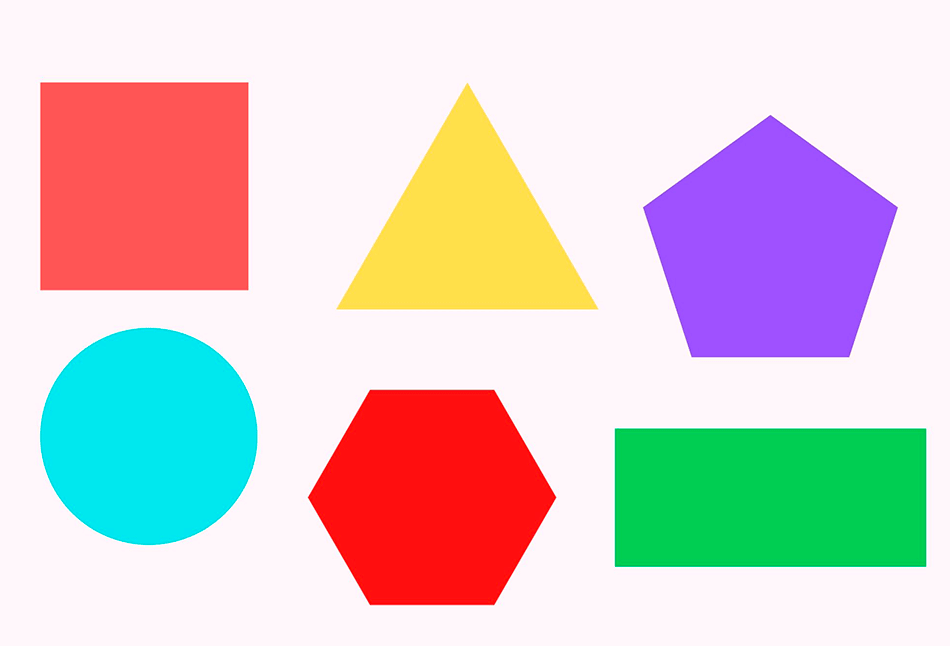

---------------------------------------------
Centros
---------------------------------------------


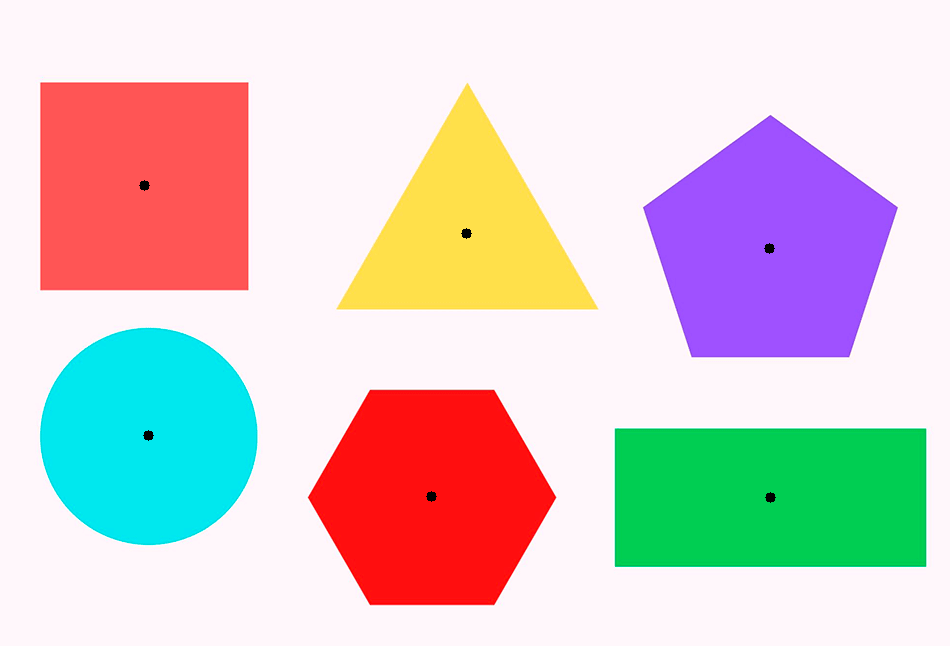

In [21]:
imagen_figs = cv2.imread('figuras_geometricas.png')
imagen_figs_cnt  = cv2.imread('figuras_geometricas.png')
gray = cv2.cvtColor(imagen_figs, cv2.COLOR_BGR2GRAY)
ret,th = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY_INV)
contornos, jerarquia = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cv2_imshow(th)
for i in range(len(contornos)):
  cnt = contornos[i]
  M = cv2.moments(cnt)
  cX = int(M["m10"]/M["m00"])
  cY = int(M["m01"]/M["m00"])

  # area = cv2.contourArea(cnt)
  # perimetro = cv2.arcLength(cnt, True)

  imagen_figs_cnt = cv2.circle(imagen_figs_cnt, (cX, cY), 5,(0,0,0),-1)

print('---------------------------------------------')
print('Original')
print('---------------------------------------------')
cv2_imshow(imagen_figs)
print('---------------------------------------------')
print('Centros')
print('---------------------------------------------')
cv2_imshow(imagen_figs_cnt)

# Momentos de Hu

In [22]:
img_K1 = 'K0.png'
img_S0 = 'S0.png'
img_S1 = 'S1.png'
img_S2 = 'S2.png'
img_S3 = 'S3.png'
img_S4 = 'S4.png'
img_S5 = 'S5.png'

image_K1 = cv2.imread(img_K1)
image_S0 = cv2.imread(img_S0)
image_S1 = cv2.imread(img_S1)
image_S2 = cv2.imread(img_S2)
image_S3 = cv2.imread(img_S3)
image_S4 = cv2.imread(img_S4)
image_S5 = cv2.imread(img_S5)

Como puedes ver, la imagen K0.png es simplemente la letra K, y S0.png es la letra S. A continuación, hemos movido la letra S en S1.png, y la hemos movido + escalado en S2.png. Hemos añadido un poco de rotación para hacer S3.png y además hemos volteado la imagen para hacer S4.png.

(-0.5, 255.5, 255.5, -0.5)

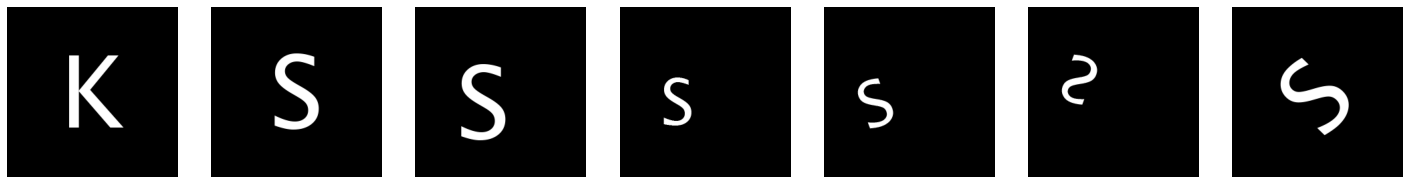

In [23]:
# create figure
fig = plt.figure(figsize=(25, 17))
  
# setting values to rows and column variables
rows = 1
columns = 7
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(image_K1)
plt.axis('off')
# plt.title("First")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(image_S0)
plt.axis('off')
# plt.title("Second")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(image_S1)
plt.axis('off')
# plt.title("Third")
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(image_S2)
plt.axis('off')
# plt.title("Fourth")

# Adds a subplot at the 5th position
fig.add_subplot(rows, columns, 5)
  
# showing image
plt.imshow(image_S3)
plt.axis('off')
# plt.title("Fourth")

# Adds a subplot at the 6th position
fig.add_subplot(rows, columns, 6)
  
# showing image
plt.imshow(image_S4)
plt.axis('off')
# plt.title("Fourth")

# Adds a subplot at the 7th position
fig.add_subplot(rows, columns, 7)
  
# showing image
plt.imshow(image_S5)
plt.axis('off')
# plt.title("Fourth")

OpenCV tiene una función incorporada para calcular los Momentos Hu. No es de extrañar que se llame HuMoments. Toma como entrada los momentos centrales de la imagen que pueden ser calculados usando la función moments

In [25]:
from math import copysign, log10

def momentosHu(file, showLogTransformedHuMoments):
  showLogTransformedHuMoments = True

  # Obtain filename from command line argument
  filename = file

  # Read image
  im = cv2.imread(filename,cv2.IMREAD_GRAYSCALE)

  # Threshold image
  _,im = cv2.threshold(im, 128, 255, cv2.THRESH_BINARY)

  # Calculate Moments
  moment = cv2.moments(im)

  # Calculate Hu Moments
  huMoments = cv2.HuMoments(moment)

  # Print Hu Moments
  print("{}: ".format(filename),end='')

  for i in range(0,7):
      if showLogTransformedHuMoments:
          # Log transform Hu Moments to make
          # squash the range
          print("{:.4f}".format(-1*copysign(1.0,\
                  huMoments[i])*log10(abs(huMoments[i]))),\
                  end='\t')
      else:
          # Hu Moments without log transform
          print("{:.4f}".format(huMoments[i]),end='\t')
  print()

Obsérvese que todos los momentos Hu de S0, S1, S2, S3 y S4 se aproximan en valor, salvo que el signo del último momento Hu de S4 está invertido. Además, observe que todos son muy diferentes de K0.

In [26]:
print('image', '\t', 'H0', '\t', 'H1', '\t', 'H2', '\t', 'H3', '\t', 'H4', '\t', '\t', 'H5', '\t', '\t', 'H6')
momentosHu(img_K1, True)
momentosHu(img_S0, True)
momentosHu(img_S1, True)
momentosHu(img_S2, True)
momentosHu(img_S3, True)
momentosHu(img_S4, True)
momentosHu(img_S5, True)

image 	 H0 	 H1 	 H2 	 H3 	 H4 	 	 H5 	 	 H6
K0.png: 2.7887	6.5064	9.4425	9.8402	-19.5930	-13.1205	19.6797	
S0.png: 2.6743	5.7745	9.9031	11.0016	-21.4722	-14.1102	22.0012	
S1.png: 2.6743	5.7745	9.9031	11.0016	-21.4722	-14.1102	22.0012	
S2.png: 2.6588	5.7358	9.6682	10.7427	-20.9914	-13.8694	21.3202	
S3.png: 2.6608	5.7450	9.8062	10.8859	-21.2468	-13.9653	21.8214	
S4.png: 2.6608	5.7450	9.8062	10.8859	-21.2468	-13.9653	-21.8214	
S5.png: 2.6692	5.7637	9.8328	10.8889	-21.3187	-14.1140	21.5326	


OpenCV proporciona una función de utilidad fácil de usar llamada matchShapes que toma dos imágenes ( o contornos ) y encuentra la distancia entre ellos usando los Momentos Hu. Por lo tanto, no es necesario calcular explícitamente los Momentos Hu. Simplemente binarice las imágenes y utilice matchShapes.

In [28]:
im1 = cv2.imread("S0.png",cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread("K0.png",cv2.IMREAD_GRAYSCALE)
im3 = cv2.imread("S4.png",cv2.IMREAD_GRAYSCALE)

m1 = cv2.matchShapes(im1,im1,cv2.CONTOURS_MATCH_I2,0)
m2 = cv2.matchShapes(im1,im2,cv2.CONTOURS_MATCH_I2,0)
m3 = cv2.matchShapes(im1,im3,cv2.CONTOURS_MATCH_I2,0)

print("Shape Distances Between \n-------------------------")

print("S0.png and S0.png : {}".format(m1))
print("S0.png and K0.png : {}".format(m2))
print("S0.png and S4.png : {}".format(m3))

Shape Distances Between 
-------------------------
S0.png and S0.png : 0.0
S0.png and K0.png : 0.10783054664091285
S0.png and S4.png : 0.008484870268973932


# Momentos de Zernike

Los momentos de Zernike se implementan dentro del paquete mahotas de Python. Este contiene muchas otras librerias de manipulacion y procesamiento de imagenes.

Documentacion de la libreria mahotas

https://mahotas.readthedocs.io/en/latest/api.html#mahotas.features.zernike_moments

In [29]:
!pip install numpy --upgrade
!pip install mahotas

     |████████████████████████████████| 5.7 MB 894 kB/s 


Sintaxis: mahotas.features.zernike_moments(im, radius, degree=8, cm={center_of_mass(im)})

Devuelve un vector de momentos de Zernike absolutos a través del grado para la imagen im.

Parámetros:	

*   im : 2-ndarray o imagen de entrada
*   radio : entero. El radio máximo para los polinomios de Zernike, en píxeles. Tenga en cuenta que el área fuera del círculo (definida en el centro de masa) definido por este radio se ignora.
*   grado : entero, opcional. Grado máximo a utilizar (por defecto: 8)
*   cm : par de flotantes, opcional. El centro de masa a utilizar. Por defecto, utiliza el centro de masa de la imagen.

Devuelve:	

*   zvalues : 1-ndarray de floats

In [31]:
# importing required libraries
import mahotas
import mahotas.demos
from pylab import gray, imshow, show
import numpy as np
import matplotlib.pyplot as plt

def momentosZernike(imagen):
  # loading image as an array of RGB values
  # img = mahotas.demos.load('lena')
  img = mahotas.imread(imagen)
  print(type(img))

  # Preprocessing: filtering image
  # print(img)
  img = img.max(2)
  # print(img)

  print("Image")
  cv2_imshow(img)
    
  # showing image
  # imshow(img)
  # show()
  
  # radius
  radius = 10
  
  # computing zernike moments
  value = mahotas.features.zernike_moments(img, radius)
    
  # printing value
  print(value)

<class 'numpy.ndarray'>
Image


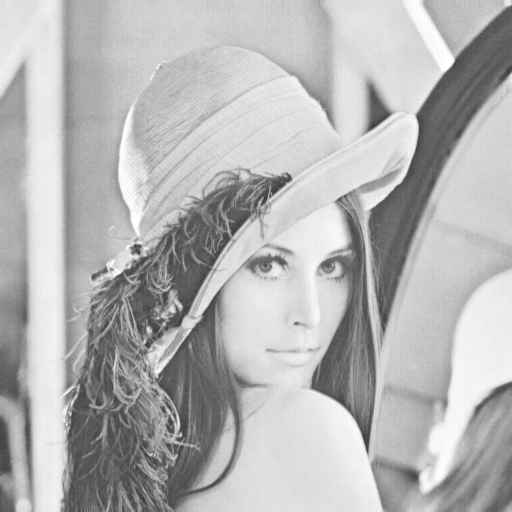

[0.31830989 0.01099909 0.00445088 0.00883642 0.00656538 0.01921388
 0.00287452 0.01905491 0.00521307 0.00175128 0.0188737  0.0026586
 0.0079883  0.00701783 0.01301286 0.00800575 0.01175043 0.01619108
 0.02735573 0.0172975  0.00905332 0.00818474 0.00468382 0.02243367
 0.00190834]


In [32]:
momentosZernike('lena_std.tif')

Una demostracion interesante que contiene la libreria es el juego "Where's Wally?" o 'wally'.

In [33]:
# Importamos las librerias
import mahotas as mh
import mahotas.demos

# A continuación tenemos que cargar la imagen "wally" de demos y mostrarla:
wally = mh.demos.load('wally')
# imshow(wally)
# show()
im_rgb = cv2.cvtColor(wally, cv2.COLOR_BGR2RGB)
cv2_imshow(im_rgb)

Output hidden; open in https://colab.research.google.com to view.

Necesitamos cambiar la imagen wally en un float y transponer la imagen, dividiendo el nuevo float de la imagen en los canales R,G,B, así como obtener el canal blanco. 

El preprocesamiento es basico al calcular los momentos de Zernike. Dependiendo del objetivo, sera la tecnica a utilizar.

In [34]:
waldo_float = wally.astype(float)
r,g,b = waldo_float.transpose((2,0,1))
# w is the color white's channel
w = waldo_float.mean(2)

Después tenemos que construir un patrón de +1,-1,+1,-1 sobre el eje y.

In [35]:
pattern = np.ones((24,16), float)
for i in range(2):
    pattern[i::4] = -1

A continuación, convolvemos el rojo menos el blanco utilizando el patrón anterior. Esto dará una respuesta fuerte donde está la camisa de Waldo.

In [36]:
v = mh.convolve(r-w, pattern)

Ahora tenemos que hacer una máscara. Una máscara en la técnica de edición de imágenes que oculta u oscurece los píxeles no deseados de una imagen:

In [37]:
mask = (v == v.max())
mask = mh.dilate(mask,np.ones((48,24)))
wally -= np.array(.8*wally * ~mask[:,:,None], dtype=wally.dtype)

Finalmente mostramos la imagen

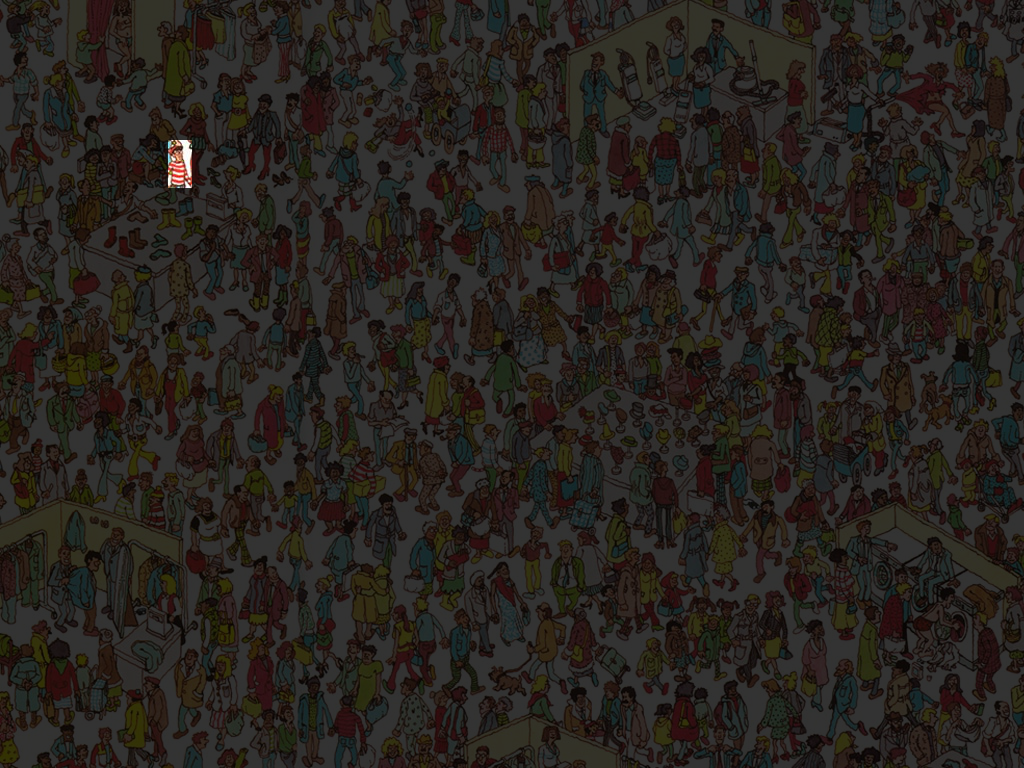

In [38]:
# imshow(wally)
im_rgb = cv2.cvtColor(wally, cv2.COLOR_BGR2RGB)
cv2_imshow(im_rgb)

# HOG

El HOG, o histograma de gradientes orientados, es un descriptor de características que se utiliza a menudo para extraer características de los datos de las imágenes. Se utiliza ampliamente en tareas de visión por ordenador para la detección de objetos.
Veamos algunos aspectos importantes de HOG que lo diferencian de otros descriptores de características:
*   El descriptor HOG se centra en la estructura o la forma de un objeto. Existen diferencias de este contra las características de borde que extraemos para las imágenes. En el caso de las características de borde, sólo identificamos si el píxel es un borde o no. El HOG es capaz de proporcionar también la dirección del borde. Esto se hace extrayendo el gradiente y la orientación (o se puede decir la magnitud y la dirección) de los bordes
*   Además, estas orientaciones se calculan en porciones "localizadas". Esto significa que la imagen completa se divide en regiones más pequeñas y para cada región se calculan los gradientes y la orientación. 
*   Finalmente, el HOG generaría un Histograma para cada una de estas regiones por separado. Los histogramas se crean utilizando los gradientes y las orientaciones de los valores de los píxeles, de ahí el nombre de 'Histograma de Gradientes Orientados'

El descriptor de características HOG cuenta las ocurrencias de la orientación del gradiente en porciones localizadas de una imagen.

Implementar HOG usando herramientas como OpenCV es extremadamente simple. Son sólo unas pocas líneas de código ya que tenemos una función predefinida llamada hog en la biblioteca skimage.feature. 


Primero cargamos las librerias y la imagen con la que vamos a trabajar.

In [39]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

img = imread('puppy_image.jpeg')
print(img.shape)

(670, 391, 3)


Para trabajar con la imagen vamos a redimensionarla.

(128, 64, 3)


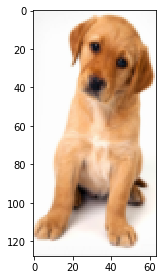

In [40]:
resized_img = resize(img, (128,64)) 
imshow(resized_img) 
print(resized_img.shape)

Aquí, se utiliza la función hog de skimage.features directamente. Así que no tenemos que calcular los gradientes, la magnitud (gradiente total) y la orientación de forma individual. La función hog lo calcularía internamente y devolvería la matriz de características. Además, si se establece el parámetro 'visualize = True', devolverá una imagen del HOG.

La matriz de características de la función se almacena en la variable fd, y la imagen se almacena en hog_image. Puede elegir cambiar los valores de los hiperparámetros y eso le dará una matriz de características de diferentes tamaños.

* Las orientaciones (orientations) son el número de cuadros que queremos crear. Para obtener una matriz de 9 x 1, las orientaciones seran 9
* pixels_per_cell define el tamaño de la celda para la que creamos los histogramas. Podemos usar 8 x 8 celdas como ejemplo pero se puede optar por cambiar este valor
* Tenemos otro hiperparámetro cells_per_block que es el tamaño del bloque sobre el que normalizamos el histograma. Aquí mencionamos las celdas por bloque y no el número de píxeles. Usaremos aquí 2 x 2 pero se puede aumentar siempre que sea una matrix cuadrada multiplo de 2.

In [42]:
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, multichannel=True)

# fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
#                     cells_per_block=(2, 2), visualize=True, multichannel=True)

Veamos la forma y los datos de la matriz de caracteristicas

In [43]:
print(fd.shape)
print(fd)

(3780,)
[0.14547623 0.04711655 0.32068446 ... 0.         0.         0.00085428]


Ahora veamos los resultados.

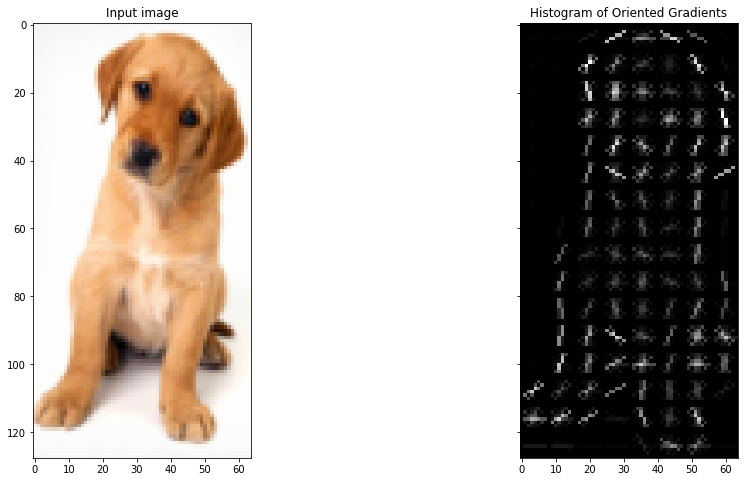

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()